# Breast Cancer Wisconsin - Using KNN Classifier

In [30]:
# Load libraries
import pandas as pd
import numpy as np
import seaborn
from sklearn.preprocessing import Imputer
from sklearn import neighbors
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.model_selection import GridSearchCV

In [31]:
# Load Data
cancer_data = pd.read_csv("D:\\Datasets\\Breast Cancer.csv")
cancer_data.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1.0,3,1,1,2
1,1002945,5,4,4,5,7,10.0,3,2,1,2
2,1015425,3,1,1,1,2,2.0,3,1,1,2
3,1016277,6,8,8,1,3,4.0,3,7,1,2
4,1017023,4,1,1,3,2,1.0,3,1,1,2


# Plot the data
The X and Y axes are the independent variables, while the colors of the points are their classes.

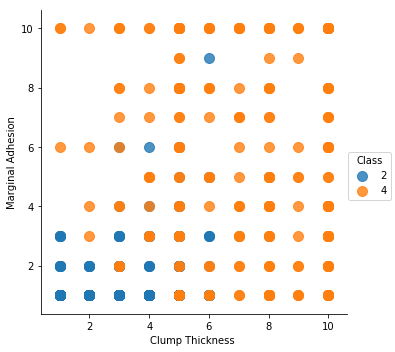

In [32]:
seaborn.lmplot('Clump Thickness ', 'Marginal Adhesion', data=cancer_data, fit_reg=False,hue="Class", scatter_kws={"marker": "D","s": 100})

From the above scatter plot we are able to understand the distribution of "Clump Thickness" and "Marginal Adhesion" based on each "Class"

In [33]:
# Removing "Sample code number" from the data since it is not required for model
cancer_data = cancer_data.drop("Sample code number", axis = 1)
cancer_data.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1.0,3,1,1,2
1,5,4,4,5,7,10.0,3,2,1,2
2,3,1,1,1,2,2.0,3,1,1,2
3,6,8,8,1,3,4.0,3,7,1,2
4,4,1,1,3,2,1.0,3,1,1,2


In [34]:
# Spliting Target Variable
predictor= cancer_data.iloc[:, cancer_data.columns != 'Class']
target= cancer_data.iloc[:, cancer_data.columns == 'Class']

# Data Imputation
Using Imputer function we impute missing values ("NaN") with "median" for categorical variable 

In [35]:
imp = Imputer(missing_values="NaN", strategy='median', axis=0)
predictor = imp.fit_transform(predictor)

# Train, Test Data Split

In [36]:
#Let us now split the dataset into train & test
from sklearn.cross_validation import train_test_split
x_train,x_test, y_train, y_test = train_test_split(predictor, target, test_size = 0.30, random_state=0)
print("x_train ",x_train.shape)
print("x_test ",x_test.shape)
print("y_train ",y_train.shape)
print("y_test ",y_test.shape)

x_train  (489, 9)
x_test  (210, 9)
y_train  (489, 1)
y_test  (210, 1)


# K Neighbors Classifier

In [37]:
clf = neighbors.KNeighborsClassifier(3, weights = 'uniform')
trained_model = clf.fit(x_train, y_train)

C:\Users\computer\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


# Predicting Test Data

In [38]:
y_pred = trained_model.predict(x_test)

# Accuracy

In [39]:
trained_model.score(x_train,y_train)

0.98773006134969321

# Choosing the value of k 

In [40]:
# Fit a KNN classifier with 3 neighbors
knn = neighbors.KNeighborsClassifier(n_neighbors=3, metric='euclidean', n_jobs=-1).fit(x_train,y_train)

C:\Users\computer\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


# Set of Parameters to Test

In [41]:
# Create a pipeline
pipe = Pipeline([('knn', knn)])

# Create space of candidate values
search_area = [{'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}]

# Search for Possible Values of k

In [42]:
# Create grid search 
clf = GridSearchCV(pipe, search_area, cv=5, verbose=0).fit(x_train,y_train)

C:\Users\computer\Anaconda3\lib\site-packages\sklearn\pipeline.py:250: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)
C:\Users\computer\Anaconda3\lib\site-packages\sklearn\pipeline.py:250: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)
C:\Users\computer\Anaconda3\lib\site-packages\sklearn\pipeline.py:250: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)
C:\Users\computer\Anaconda3\lib\site-packages\sklearn\pipeline.py:250: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

C:\Users\computer\Anaconda3\lib\site-packages\sklearn\pipeline.py:250: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)
C:\Users\computer\Anaconda3\lib\site-packages\sklearn\pipeline.py:250: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)
C:\Users\computer\Anaconda3\lib\site-packages\sklearn\pipeline.py:250: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)
C:\Users\computer\Anaconda3\lib\site-packages\sklearn\pipeline.py:250: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

# View k For Best Performing Model

In [43]:
# Best neighborhood size (k)
clf.best_estimator_.get_params()['knn__n_neighbors']

8

From the above information the best value of k to build the KNN Classifier model is 8.